# Question 1

In [22]:
import pandas as pd
import numpy as np
import math
data = pd.read_csv('msft.csv', header='infer')
data

Date       Open       High        Low      Close    Volume  \
0     12/30/2016  62.959999  62.990002  62.029999  62.139999  25465900   
1     12/29/2016  62.860001  63.200001  62.730000  62.900002  10181600   
2     12/28/2016  63.400002  63.400002  62.830002  62.990002  14247400   
3     12/27/2016  63.209999  64.070000  63.209999  63.279999  11583900   
4     12/23/2016  63.450001  63.540001  62.799999  63.240002  12398000   
...          ...        ...        ...        ...        ...       ...   
2513    1/9/2007  30.000000  30.180000  29.730000  29.959999  44636600   
2514    1/8/2007  29.650000  30.100000  29.530001  29.930000  50220200   
2515    1/5/2007  29.629999  29.750000  29.450001  29.639999  44607200   
2516    1/4/2007  29.700001  29.969999  29.440001  29.809999  45774500   
2517    1/3/2007  29.910000  30.250000  29.400000  29.860001  76935100   

      Adj Close  
0     62.139999  
1     62.900002  
2     62.990002  
3     63.279999  
4     63.240002  
...         ...  
2513  23.557044  
2514  23.533456  
2515  23.305433  
2516  23.439102  
2517  23.478417  

[2518 rows x 7 columns]

In [7]:
data.Close.describe()

count    2518.000000
mean       33.993987
std        10.549777
min        15.150000
25%        26.770000
50%        29.980000
75%        41.475000
max        63.619999
Name: Close, dtype: float64

## Equal Width Discretization

In [6]:
bins = pd.cut(data.Close,5)
bins.head()

0    (53.926, 63.62]
1    (53.926, 63.62]
2    (53.926, 63.62]
3    (53.926, 63.62]
4    (53.926, 63.62]
Name: Close, dtype: category
Categories (5, interval[float64, right]): [(15.102, 24.844] < (24.844, 34.538] < (34.538, 44.232] < (44.232, 53.926] < (53.926, 63.62]]

## Equal Frequency Discretization

In [8]:
bins = pd.qcut(data.Close,[0,0.2,0.4,0.6,0.8, 1])
bins.head()

0    (44.4, 63.62]
1    (44.4, 63.62]
2    (44.4, 63.62]
3    (44.4, 63.62]
4    (44.4, 63.62]
Name: Close, dtype: category
Categories (5, interval[float64, right]): [(15.149000000000001, 25.89] < (25.89, 28.678] < (28.678, 31.854] < (31.854, 44.4] < (44.4, 63.62]]

# Question 2
### Below is my implementation of the entropy based discretization. I set the stopping critera as number of bins = 3. This was for clarity. It prints the 3 best entropy-based bins for each column. This stopping criteria could be changed to an arbitrary number of bins

In [91]:
vehicles_df = pd.read_csv("vehicles.csv")
vehicles_df = vehicles_df[((vehicles_df["class"] == "van") | (vehicles_df["class"] == "bus"))]
vehicles_df["class"] = vehicles_df["class"].replace(["van"],0)
vehicles_df["class"] = vehicles_df["class"].replace(["bus"],1)
vehicles_df

compactness  circularity  distance_circularity  radius_ratio  \
43            80           43                    71           133   
44            83           44                    70           166   
45           102           51                    92           194   
46            85           43                    66           123   
47            81           44                    72           139   
..           ...          ...                   ...           ...   
841           88           40                    55           114   
842           86           39                    62           129   
843           94           47                    85           333   
844           86           40                    66           139   
845           92           38                    60           130   

     pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
43                     60                        7            150   
44                     69                        5            143   
45                     60                        6            220   
46                     55                        7            150   
47                     60                        6            153   
..                    ...                      ...            ...   
841                    53                        7            132   
842                    59                        6            116   
843                   138                       49            155   
844                    59                        7            122   
845                    62                        5            114   

     elongatedness  pr_axisrectangular  lengthrectangular  majorvariance  \
43              45                  19                146            170   
44              46                  18                143            166   
45              30                  25                162            247   
46              45                  19                146            172   
47              44                  19                146            180   
..             ...                 ...                ...            ...   
841             53                  18                139            142   
842             57                  17                135            137   
843             43                  19                155            320   
844             54                  17                139            145   
845             58                  17                132            135   

     minorvariance  gyrationradius  majorskewness  minorskewness  \
43             330             176             81              6   
44             306             170             69              7   
45             731             209             80              7   
46             326             173             83              4   
47             347             178             81              1   
..             ...             ...            ...            ...   
841            249             158             87              0   
842            203             145             64              7   
843            354             187            135             12   
844            225             143             63              7   
845            194             137             72             14   

     minorkurtosis  majorkurtosis  hollows_ratio  class  
43              15            180            184      1  
44               6            188            193      1  
45               7            188            186      1  
46              15            180            183      1  
47              15            182            186      1  
..             ...            ...            ...    ...  
841              7            176            183      0  
842              9            199            204      0  
843              9            188            196      0  
844             11            202    

while bins less than amount
    for each df
    calculate entropy total
    for bin with highest entropy
    
        find index to split on
        for index in dataframe
            split dataframe
            check entropy of both new dataframes
            divide each by count in dataframe and add
            check if entropy is less than for best index to split
            update if new best index is found
            return index to split
    
        split dataframe based on index
        update bin number
    
    

In [258]:
def entropy(df):
    # print(len(df[df['class'] == 0]))
    
    zero_percent = (len(df[df['class'] == 0]) / len(df['class']))
    one_percent = (len(df[df['class'] == 1]) / df['class'].count())
    if zero_percent != 0:
        zero_log =  math.log2(len(df[df['class'] == 0]) / df['class'].count())
        entropy0 = zero_percent * zero_log
    else: entropy0 = 0
    
    if one_percent != 0:
        one_log =  math.log2(len(df[df['class'] == 1]) / df['class'].count())
        entropy1 = one_percent * one_log
    else: entropy1 = 0
    
    entropy = -((entropy0) + (entropy1))

    # entropy = -(((len(df[df['class'] == 0]) / df['class'].count()) * math.log2(len(df[df['class'] == 0]) / df['class'].count())) + ((len(df[df['class'] == 1]) / df['class'].count()) * math.log2(len(df[df['class'] == 1])/df['class'].count())))
    return entropy

In [249]:
entropy(vehicles_df)
# a = vehicles_df.iloc([43])



0.998501937258678

In [93]:
vehicles_df.reset_index(drop=True, inplace=True)
vehicles_df

compactness  circularity  distance_circularity  radius_ratio  \
0             80           43                    71           133   
1             83           44                    70           166   
2            102           51                    92           194   
3             85           43                    66           123   
4             81           44                    72           139   
..           ...          ...                   ...           ...   
412           88           40                    55           114   
413           86           39                    62           129   
414           94           47                    85           333   
415           86           40                    66           139   
416           92           38                    60           130   

     pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
0                      60                        7            150   
1                      69                        5            143   
2                      60                        6            220   
3                      55                        7            150   
4                      60                        6            153   
..                    ...                      ...            ...   
412                    53                        7            132   
413                    59                        6            116   
414                   138                       49            155   
415                    59                        7            122   
416                    62                        5            114   

     elongatedness  pr_axisrectangular  lengthrectangular  majorvariance  \
0               45                  19                146            170   
1               46                  18                143            166   
2               30                  25                162            247   
3               45                  19                146            172   
4               44                  19                146            180   
..             ...                 ...                ...            ...   
412             53                  18                139            142   
413             57                  17                135            137   
414             43                  19                155            320   
415             54                  17                139            145   
416             58                  17                132            135   

     minorvariance  gyrationradius  majorskewness  minorskewness  \
0              330             176             81              6   
1              306             170             69              7   
2              731             209             80              7   
3              326             173             83              4   
4              347             178             81              1   
..             ...             ...            ...            ...   
412            249             158             87              0   
413            203             145             64              7   
414            354             187            135             12   
415            225             143             63              7   
416            194             137             72             14   

     minorkurtosis  majorkurtosis  hollows_ratio  class  
0               15            180            184      1  
1                6            188            193      1  
2                7            188            186      1  
3               15            180            183      1  
4               15            182            186      1  
..             ...            ...            ...    ...  
412              7            176            183      0  
413              9            199            204      0  
414              9            188            196      0  
415             11            202    

In [179]:
vehicles_df.columns
for column in vehicles_df.columns:
    print(column)

compactness
circularity
distance_circularity
radius_ratio
pr_axis_aspect_ratio
max_length_aspect_ratio
scatter_ratio
elongatedness
pr_axisrectangular
lengthrectangular
majorvariance
minorvariance
gyrationradius
majorskewness
minorskewness
minorkurtosis
majorkurtosis
hollows_ratio
class


In [204]:
# new_df = vehicles_df[['class', 'class']]
# new_df
# new_df.reset_index(drop=True, inplace=True)
# new_df

class  class
0        1      1
1        1      1
2        1      1
3        1      1
4        1      1
..     ...    ...
412      0      0
413      0      0
414      0      0
415      0      0
416      0      0

[417 rows x 2 columns]

In [320]:
def find_new_dfs(df):
    lowest_entropy = 2
    best_index = None
    best_df1 = None
    best_df2 = None
    for index in df.index:
        # print(index)
        df1 = df.iloc[:(index+1)]
        
        # df1.reset_index(drop=True, inplace=True)
        # print(df1)
        if len(df1) == 0:
            continue
        
        df2 = df.iloc[(index+1):]
        
        # df2.reset_index(drop=True, inplace=True)
        if len(df2)==0:
            continue
        # print(df2)
        entropy_df1 = entropy(df1)
        entropy_df2 = entropy(df2)
        weighted_entropy = ((len(df1) / len(df))* entropy_df1) + ((len(df2) / len(df)) * entropy_df2)
        
        if weighted_entropy < lowest_entropy:
            best_df1 = df1
            best_df2 = df2
            lowest_entropy = weighted_entropy
    # return best_df1.reset_index(drop=True, inplace=True), best_df2.reset_index(drop=True, inplace=True)
    return best_df1, best_df2

In [339]:
def find_bins(base_df):
    dfs = []
    n_bins = 1
    while n_bins < 4: 
        if n_bins == 1:
            highest_entropy_df = base_df
            dfs.append(base_df)
        else:
            highest_entropy_df = dfs[0]
        i = 0
        index_to_remove = 0
        for df in dfs:
            current_entropy = entropy(df)
            
            if current_entropy >= entropy(highest_entropy_df):
                highest_entropy_df = df
                index_to_remove = i
                    # print(highest_entropy_df)
            i +=1
        
        
        
        # print(n_bins)
        # print(highest_entropy_df)
        df1, df2 = find_new_dfs(highest_entropy_df)
        del dfs[index_to_remove]
        
        dfs.append(df1)
        dfs.append(df2)
        # print(dfs)
        n_bins +=1
    del dfs[0]
    return dfs

In [342]:
for column in vehicles_df.columns:
    if column == 'class':
        pass
    else:
        df_to_search = vehicles_df[[column, 'class']]
        df_to_search = df_to_search.sort_values(by=[column])
        df_to_search.reset_index(drop=True, inplace=True)
        # display(df_to_search)
        sampled_dfs = find_bins(df_to_search)
        print(f'bins of {column}')
        for bins in sampled_dfs:
            print(bins)
        # break
    

bins of compactness
    compactness  class
0            78      1
1            79      1
2            79      1
3            80      1
4            80      1
5            80      1
6            80      1
7            80      1
8            80      1
9            81      1
10           81      1
11           81      1
12           81      1
13           81      1
14           81      1
15           81      1
16           81      1
17           81      1
18           81      1
19           81      1
20           81      1
21           82      1
22           82      1
23           82      1
24           82      1
25           82      1
26           82      1
27           82      1
28           82      1
29           82      0
30           82      1
31           82      1
32           82      1
33           83      1
34           83      1
35           83      1
36           83      1
37           83      1
     compactness  class
38            83      0
39            83      0
40         

# Question 3

## mean absolute deviation

 ### The best features will have the most deviation. The top  5features in this regard and by a good margin, from best to worst are:
 ### minorvariance, radius_ratio, gyrationradius, majorvariance, scatter_ratio

In [345]:
vehicles_df.mad()

compactness                  5.378776
circularity                  3.661911
distance_circularity         9.089005
radius_ratio                23.996998
pr_axis_aspect_ratio         6.503839
max_length_aspect_ratio      2.649690
scatter_ratio               18.986917
elongatedness                4.753170
pr_axisrectangular           1.518635
lengthrectangular            8.215252
majorvariance               20.781740
minorvariance              103.547481
gyrationradius              22.244489
majorskewness                6.184842
minorskewness                3.239492
minorkurtosis                5.351632
majorkurtosis                5.964161
hollows_ratio                6.886359
class                        0.498962
dtype: float64

## correlation matrix

### we can choose to remove some features that are highly correlated near +- 1. Minor variance has high correlations with several variables above 0.9
### similarly majorvariance and pr_axisrectangular have sever variables they are highly correlated with. A reduced model without these variables may help

In [347]:
vehicles_df.corr()

compactness  circularity  distance_circularity  \
compactness                 1.000000     0.496086              0.680573   
circularity                 0.496086     1.000000              0.760539   
distance_circularity        0.680573     0.760539              1.000000   
radius_ratio                0.503517     0.403049              0.567068   
pr_axis_aspect_ratio       -0.008624     0.033695              0.113316   
max_length_aspect_ratio    -0.120252     0.051342              0.066919   
scatter_ratio               0.715945     0.819974              0.838144   
elongatedness              -0.665682    -0.785659             -0.836860   
pr_axisrectangular          0.725261     0.813960              0.830514   
lengthrectangular           0.452937     0.921991              0.746070   
majorvariance               0.664337     0.761948              0.781920   
minorvariance               0.738661     0.795764              0.817507   
gyrationradius              0.410528     0.952140              0.666280   
majorskewness              -0.073339     0.309363              0.040609   
minorskewness               0.171060     0.109621              0.067434   
minorkurtosis               0.203079     0.046551              0.249365   
majorkurtosis               0.302422    -0.279627              0.043785   
hollows_ratio               0.116808    -0.311042              0.029218   
class                       0.075748     0.310074              0.145640   

                         radius_ratio  pr_axis_aspect_ratio  \
compactness                  0.503517             -0.008624   
circularity                  0.403049              0.033695   
distance_circularity         0.567068              0.113316   
radius_ratio                 1.000000              0.795934   
pr_axis_aspect_ratio         0.795934              1.000000   
max_length_aspect_ratio      0.413101              0.698238   
scatter_ratio                0.531105             -0.000190   
elongatedness               -0.625946             -0.128410   
pr_axisrectangular           0.493553             -0.038382   
lengthrectangular            0.304994             -0.006809   
majorvariance                0.675532              0.251450   
minorvariance                0.523119             -0.019837   
gyrationradius               0.340908              0.004489   
majorskewness                0.108696              0.208062   
minorskewness               -0.011070             -0.038166   
minorkurtosis                0.137699             -0.018541   
majorkurtosis                0.408507              0.299954   
hollows_ratio                0.311982              0.333469   
class                        0.298309              0.106793   

                         max_length_aspect_ratio  scatter_ratio  \
compactness                            -0.120252       0.715945   
circularity                             0.051342       0.819974   
distance_circularity                    0.066919       0.838144   
radius_ratio                            0.413101       0.531105   
pr_axis_aspect_ratio                    0.698238      -0.000190   
max_length_aspect_ratio                 1.000000      -0.085913   
scatter_ratio                          -0.085913       1.000000   
elongatedness                           0.059575      -0.957246   
pr_axisrectangular                     -0.089395       0.990345   
lengthrectangular                       0.153714       0.703586   
majorvariance                           0.188133       0.927400   
minorvariance                          -0.110313       0.994081   
gyrationradius                          0.027503       0.798699   
majorskewness                           0.472707       0.262508   
minorskewness                          -0.010332      -0.007008   
minorkurtosis                           0.016866       0.232081   
majorkurtosis                          -0.091297      -0.111864   
hollows_ratio                           0.052731      -0.

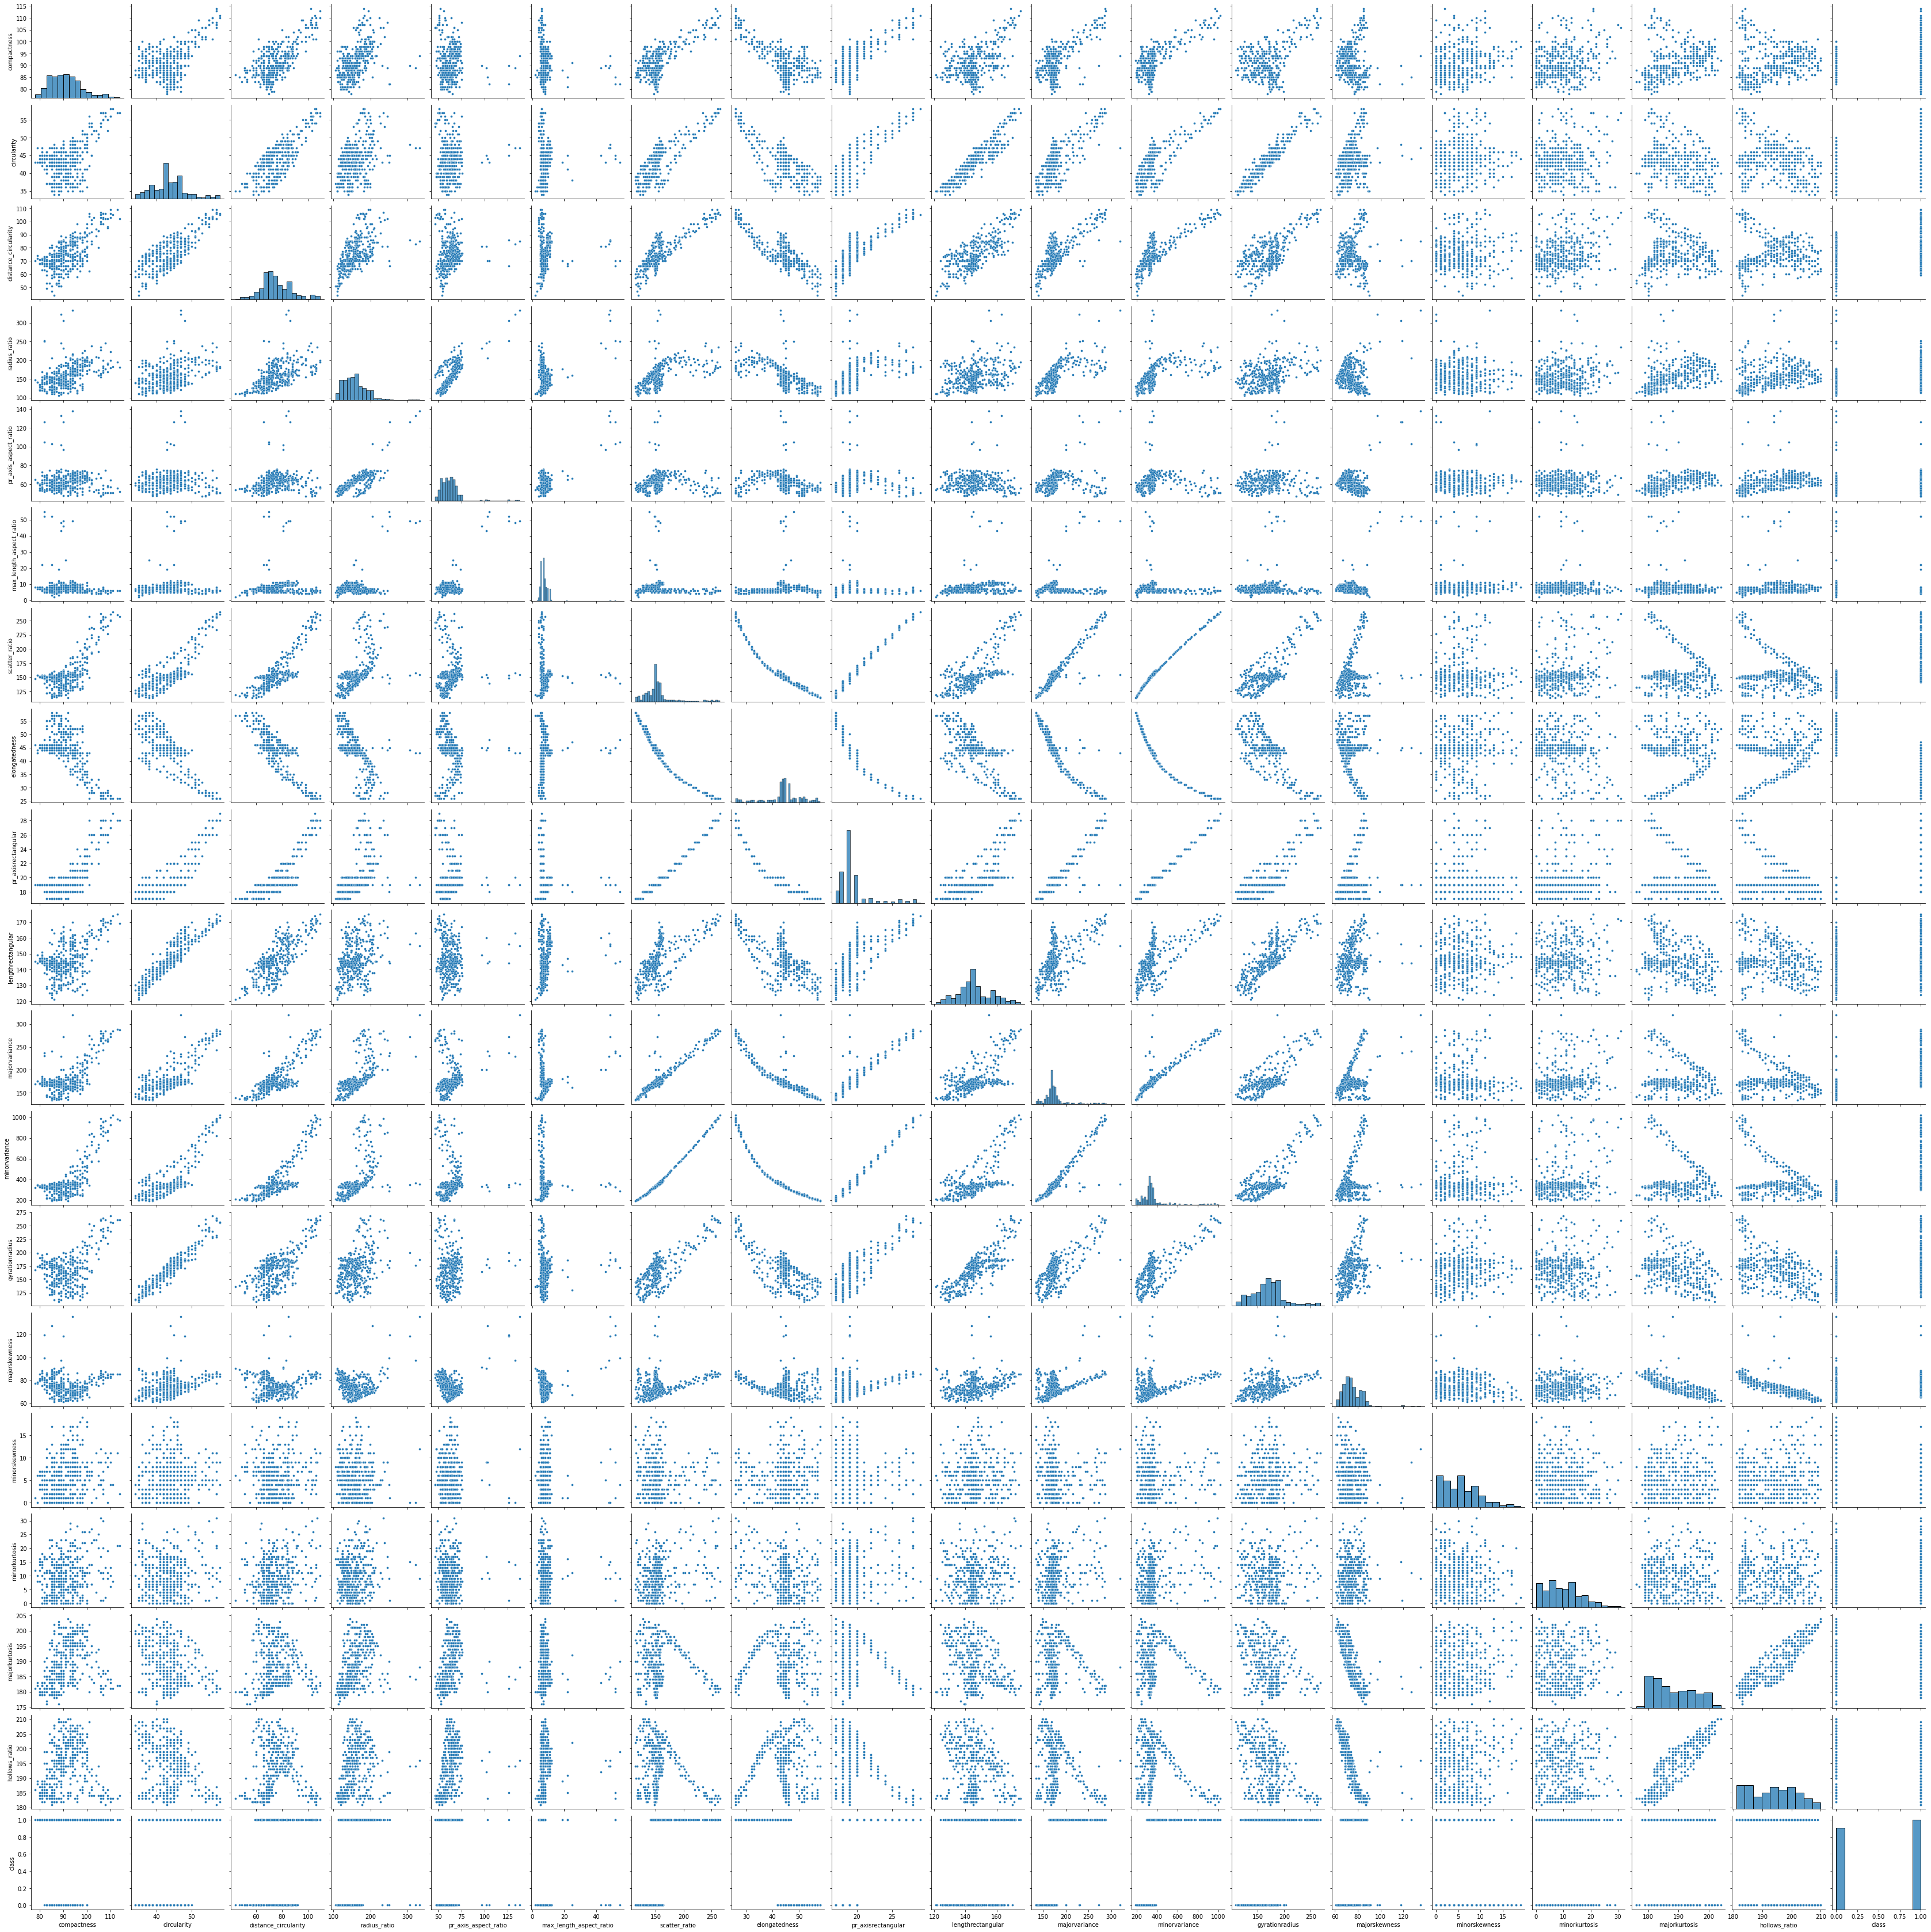

In [348]:
import seaborn as sns
g = sns.pairplot(vehicles_df, plot_kws={'s': 15})

# Question 4
## a)

In [409]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
scaled_vehicles = scaler.fit_transform(vehicles_df.to_numpy())


In [410]:
pca = PCA().fit(scaled_vehicles)

## b)
### 5 components are needed to explain 90% of the variance and 10 are needed to explain 99%

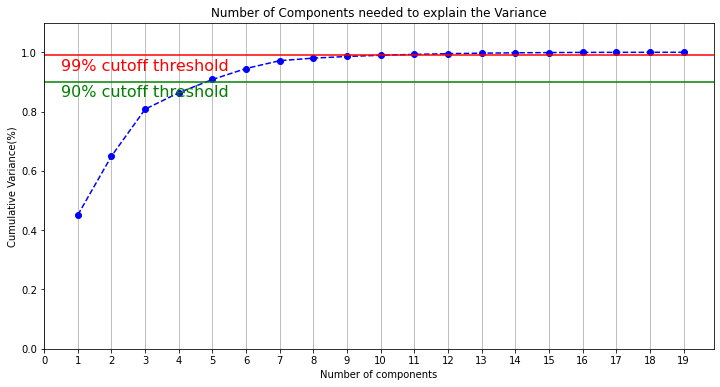

In [364]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 6)

fig, ax = plt.subplots()
xi = np.arange(1, 20, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of components')
plt.xticks(np.arange(0,20,step=1))
plt.ylabel('Cumulative Variance(%)')
plt.title('Number of Components needed to explain the Variance')

plt.axhline(y=0.99, color='r', linestyle='-')
plt.axhline(y=0.90, color='green', linestyle='-')

plt.text(0.5,0.94, '99% cutoff threshold', color='red', fontsize=16)
plt.text(0.5,0.85, '90% cutoff threshold', color='green', fontsize=16)

ax.grid(axis='x')
plt.show()

## C)
### PC1 caputures most of the variance, vans are very tightly gouped and buses have a bit more of a variation over the PC

In [455]:
# scaled_vehicles = scaler.fit_transform(vehicles_df)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(vehicles_df)
# pca_features

array([[-4.91987119e+01, -2.25155123e+01],
       [-7.19154693e+01,  1.39056375e+01],
       [ 3.71082122e+02,  8.85724759e-01],
       [-5.41691203e+01, -3.17555333e+01],
       [-2.98119454e+01, -1.66721363e+01],
       [ 1.94581802e+02,  1.85913044e+01],
       [ 6.33170692e+02, -2.69953477e+01],
       [-2.15591999e+01, -4.53160295e+00],
       [-5.32677799e+01, -3.68122647e+01],
       [ 2.67840233e+02,  4.65296408e+01],
       [ 2.14098230e+02,  2.98303937e+01],
       [-5.80737180e+01, -3.99340488e+01],
       [-5.06053290e+01, -2.04623537e+01],
       [-6.21913945e+01, -3.28158651e+01],
       [-5.01418090e+01, -4.29779728e+01],
       [-4.85449128e+01,  2.18964559e+01],
       [-5.33911675e+01, -3.37067158e+01],
       [-4.72765318e+01, -3.73655761e+01],
       [ 3.58215924e+02,  9.00320606e+00],
       [-5.33134929e+01, -1.08997063e+01],
       [-6.11721035e+01, -3.58563635e+01],
       [ 5.34561945e+02, -5.13981478e+01],
       [-1.47298713e+02,  6.24639447e+00],
       [-1.

In [420]:
pca = PCA(n_components=2)
pca_features = pca.fit(scaled_vehicles).transform(scaled_vehicles)

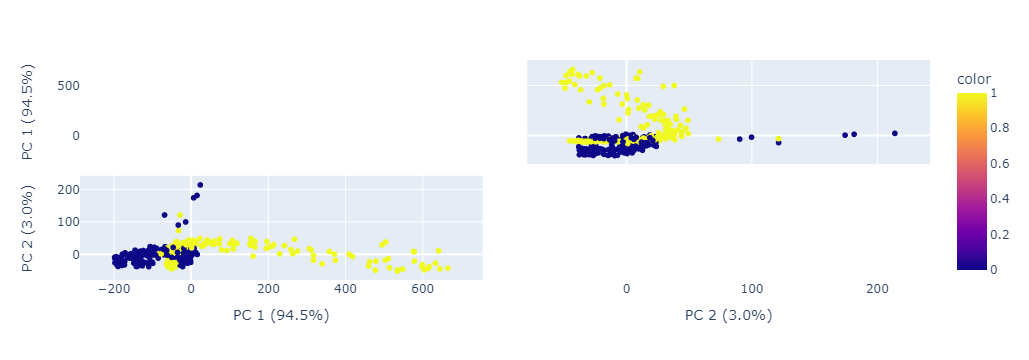

In [460]:
import plotly.express as px

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    pca_features,
    labels=labels,
    dimensions=range(2),
    color=vehicles_df["class"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [481]:
# from numpy import linalg, mean, dot
# from pandas import DataFrame

# num_components = 2
# cov = np.cov(scaled_vehicles)
# A = scaled_vehicles
# [eigvals, pcs] = linalg.eig(cov)

# sorted_index = np.argsort(eigvals[::1])
# eigvals = eigvals[sorted_index]
# pcs = pcs[:,sorted_index]

# M = (A - mean(A.T, axis=1))
# projected = dot(pcs.T, M)
# projected = DataFrame(projected[:,:num_components], columns=['pc1', 'pc2'])
# projected.to_numpy()

array([[-2.97827858e-03-6.80578096e-03j, -2.80029326e-03-6.90284465e-03j],
       [-2.97827858e-03+6.80578096e-03j, -2.80029326e-03+6.90284465e-03j],
       [ 1.09144932e-02+1.22606897e-03j,  8.62768628e-03+9.84422124e-04j],
       [ 1.09144932e-02-1.22606897e-03j,  8.62768628e-03-9.84422124e-04j],
       [-1.73938605e-03+1.43039158e-02j, -2.28014031e-03+1.04504451e-02j],
       [-1.73938605e-03-1.43039158e-02j, -2.28014031e-03-1.04504451e-02j],
       [ 9.33576904e-03-1.28437532e-03j,  8.15798021e-03-1.04826221e-03j],
       [ 9.33576904e-03+1.28437532e-03j,  8.15798021e-03+1.04826221e-03j],
       [-1.20018817e-02+2.67576623e-03j, -8.27960575e-03+2.35515307e-03j],
       [-1.20018817e-02-2.67576623e-03j, -8.27960575e-03-2.35515307e-03j],
       [-9.78620586e-03+0.00000000e+00j, -8.98159593e-03+0.00000000e+00j],
       [-2.84830622e-03-1.14022817e-02j, -1.96408326e-03-9.01426153e-03j],
       [-2.84830622e-03+1.14022817e-02j, -1.96408326e-03+9.01426153e-03j],
       [-4.17980128e-03+1

ValueError: Length of values (2) does not match length of index (19)

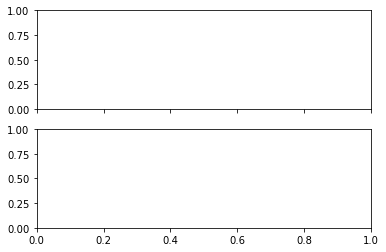

In [482]:
# %matplotlib inline
# from pandas import Series

# fig,axes = plt.subplots(2,1,sharex=True)
# attrib = list(vehicles_df)
# pcdata = Series(projected.to_numpy()[0,:], index=attrib)
# pcdata.plot(kind='barh', ax=axes[0], color='k', alpha=0.7)
# axes[0].set_title(r'1st PC', size='x-large')

# pcdata.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)
# axes[1].set_title(r'2nd PC', size='x-large')

## D)
### Feature Importance to PC1 and PC2 plotted below:
### Top 3 features for PC1: MinorVariance, Scatter_ratio, MajorVariance
### Top 3 features for PC2: radius_ratio, pr_axis_aspect_ratio, MajorVariance
PC1 captured much more of the information as seen above, so I'll comment on it. Specifically the minorvariance feature greatly contributes. I think this might be because the minorvariance feature was so heavily correlated with some of the other features. it is very representative of the overall data. however because of its high covariance maybe it would be better to remove it and then do this process again for a better model

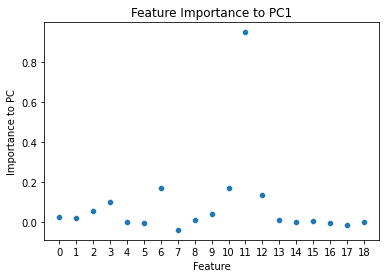

In [514]:

g = sns.scatterplot(data = pca.components_[0]).set(title='Feature Importance to PC1', xlabel='Feature', ylabel='Importance to PC', xticks=range(19))



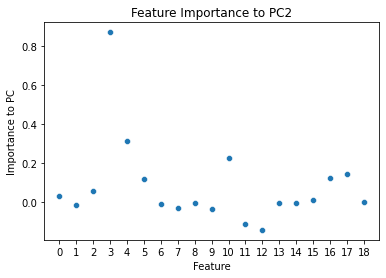

In [515]:
g = sns.scatterplot(data = pca.components_[1]).set(title='Feature Importance to PC2', xlabel='Feature', ylabel='Importance to PC', xticks=range(19))


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

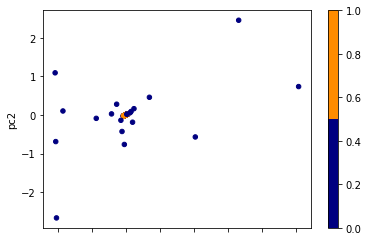

In [453]:
# import matplotlib
# %matplotlib inline
# colors = ['navy','darkorange']
# projected.plot(kind='scatter', x='pc1', y='pc2', c=vehicles_df['class'], cmap=matplotlib.colors.ListedColormap(colors))

# Question 5

In [18]:
# pip install tweet-preprocessor

Note: you may need to restart the kernel to use updated packages.


In [60]:
import json

with open ('wh.json', 'r') as f:
    for l in f.readlines():
        if not l.strip (): # skip empty lines
            continue
        json_data = json.loads(l)
text = json_data['text']

In [61]:
string.punctuationfree="".join([i for i in text if i not in string.punctuation])
string.punctuationfree

'RT WhiteHouse What you need to know about the US response to Russia httpstcoSj71a1MYuh'

In [62]:
text.lower()

'rt @whitehouse: what you need to know about the u.s. response to russia: https://t.co/sj71a1myuh'

In [63]:
tokens=text.split(' ')
tokens

['RT',
 '@WhiteHouse:',
 'What',
 'you',
 'need',
 'to',
 'know',
 'about',
 'the',
 'U.S.',
 'response',
 'to',
 'Russia:',
 'https://t.co/Sj71a1MYuh']

In [64]:
re.split(' ',text)

['RT',
 '@WhiteHouse:',
 'What',
 'you',
 'need',
 'to',
 'know',
 'about',
 'the',
 'U.S.',
 'response',
 'to',
 'Russia:',
 'https://t.co/Sj71a1MYuh']

In [65]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
[i for i in text.lower().split(' ') if i not in stopwords]

['rt',
 '@whitehouse:',
 'need',
 'know',
 'u.s.',
 'response',
 'russia:',
 'https://t.co/sj71a1myuh']

In [66]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

stem_text = [porter_stemmer.stem(word) for word in tokens]
stem_text

['rt',
 '@whitehouse:',
 'what',
 'you',
 'need',
 'to',
 'know',
 'about',
 'the',
 'u.s.',
 'respons',
 'to',
 'russia:',
 'https://t.co/sj71a1myuh']

In [67]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arist\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [68]:
# lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in tokens]
# lemm_text

In [69]:
def remove_URL(text):
    return re.sub(r"http\S+", "", text)
remove_URL(text)

'RT @WhiteHouse: What you need to know about the U.S. response to Russia: '